In [163]:
import tensorflow
from tensorflow import keras

In [164]:
data=keras.utils.image_dataset_from_directory(
    directory=r'D:\CODING\Project Mask detection\train',
    labels="inferred",
    shuffle=True,
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
    
)

Found 5988 files belonging to 2 classes.


In [165]:
class_name=data.class_names
class_name

['with_mask', 'without_mask']

In [166]:
for image_batch,labels_batch in data.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1]


In [167]:
import matplotlib.pyplot as plt

(32, 256, 256, 3)
[1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1]


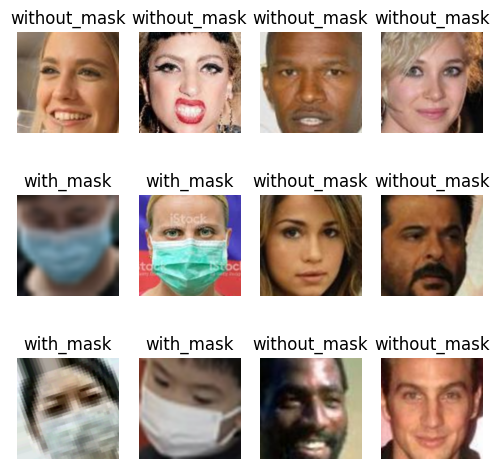

In [168]:
plt.figure(figsize=(6,6))
for image_batch,labels_batch in data.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[labels_batch[i]])
        plt.axis("off")

In [169]:
train_size = int(0.8 * len(data))
val_size = int(0.1 * len(data))

train_data = data.take(train_size)
test_data = data.skip(train_size)
val_data = test_data.take(val_size)
test_data = test_data.skip(val_size)


In [170]:
len(train_data)*32


4800

In [171]:
len(test_data)*32

640

In [172]:
len(val_data)*32

576

In [173]:
def process(image, label):
    image = image / 255.0 
    return image, label

train_data=train_data.map(process)
test_data=(test_data.map(process))
val_data=(val_data.map(process))

(256, 256, 3)


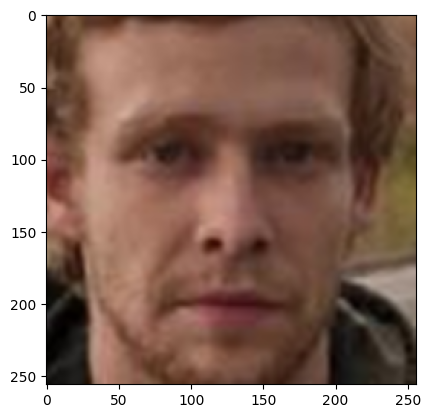

In [174]:
import numpy
for image_batch,labels_batch in train_data.take(1):
    plt.imshow(image_batch[0].numpy())
    print(image_batch[0].numpy().shape)


In [175]:
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D
from tensorflow.keras import Sequential

In [176]:
model=Sequential()

In [177]:
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [178]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [179]:
model.fit(train_data,epochs=10,validation_data=val_data)

Epoch 1/10
 23/150 ━━━━━━━━━━━━━━━━━━━━ 54s 430ms/step - accuracy: 0.6818 - loss: 0.9830

KeyboardInterrupt: 

In [125]:
model.save("model.h5")